

# Project: Investigate a Dataset - tmdb-movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project we'll be analyzing data associated with 10,000 movies collected from TMDB, where each row corresponds to a movie that contains data about the movie, some of these data incude:<br/>
<ul>
  <li>Budget</li>
  <li>Revenue</li>
  <li>Cast</li>
  <li>Director</li>
  <li>Original title</li>
  <li>Average rating</li>
</ul>



### Question(s) for Analysis

<ol>
  <li>What is the popularity of genres across the years?</li>
  <li>What properties are associated with high revenue?</li>
  <li>Who are the top earning directors?</li>
    <li>Who are the top earning actors?</li>
    <li>Is budget associated with high revenue?</li>
    <li>Is runtime associated with high revenue?</li>
    <li>Is rating associated with high revenue?</li>
    <li>Is popularity associated with high revenue?</li>
</ol>


In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.



### Data Cleaning
 

In [2]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### We drop the unnecessary columns that we won't need in determining anything in the data.

In [6]:
df.drop(['id','imdb_id','original_title','tagline','overview','homepage','budget_adj', 'revenue_adj','keywords'],axis = 1, inplace = True)
df.head()

,popularity,budget,revenue,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   cast                  10790 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   release_date          10866 non-null  object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_year          10866 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1018.8+ KB


### We then drop the movies with runtime 0 minutes because it doesn't make sense that a movie doesn't have a runtime

In [8]:
df.drop(df[ (df['runtime'] == 0)].index, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10835 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10835 non-null  float64
 1   budget                10835 non-null  int64  
 2   revenue               10835 non-null  int64  
 3   cast                  10759 non-null  object 
 4   director              10793 non-null  object 
 5   runtime               10835 non-null  int64  
 6   genres                10813 non-null  object 
 7   production_companies  9823 non-null   object 
 8   release_date          10835 non-null  object 
 9   vote_count            10835 non-null  int64  
 10  vote_average          10835 non-null  float64
 11  release_year          10835 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.1+ MB


In [9]:
df[df['genres'].isna()]

,popularity,budget,revenue,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
424,0.244648,0,0,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,NaN,10/29/15,21,6.1,2015
620,0.129696,0,0,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015
997,0.330431,0,0,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,44,NaN,NaN,10/3/14,13,6.8,2014
1712,0.302095,0,0,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009
1897,0.020701,0,0,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,76,NaN,NaN,2/27/09,11,7.0,2009
2376,0.068411,0,0,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,62,NaN,NaN,12/25/10,11,7.7,2010
2853,0.130018,0,0,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,YÄ±lmaz ErdoÄŸan,110,NaN,NaN,2/2/01,12,7.2,2001
3279,0.145331,0,0,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,Kim Jin-Yeong,96,NaN,NaN,8/13/08,11,6.1,2008
4547,0.520520,0,0,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,Danny Boyle,220,NaN,BBC,7/27/12,12,8.3,2012
4732,0.235911,0,0,Andrew Scott|Jodhi May|Eileen Atkins|Matthew R...,Charles Sturridge,100,NaN,Island Pictures,9/9/12,12,6.2,2012


### We then investigate the rows where the genres are NaN and drop them since most of them have a budget and a revenue of 0 and no production companies either

In [10]:
df.drop(df[(df['genres'].isna() == True)].index, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10813 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10813 non-null  float64
 1   budget                10813 non-null  int64  
 2   revenue               10813 non-null  int64  
 3   cast                  10738 non-null  object 
 4   director              10773 non-null  object 
 5   runtime               10813 non-null  int64  
 6   genres                10813 non-null  object 
 7   production_companies  9814 non-null   object 
 8   release_date          10813 non-null  object 
 9   vote_count            10813 non-null  int64  
 10  vote_average          10813 non-null  float64
 11  release_year          10813 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis




## Research Question 1: What is the most popular genre across the years?

### We first extract all types of genres that are present in the data

In [112]:
genres = list(df['genres'].apply(lambda x: str(x).split("|")[0]).drop_duplicates())
print(genres)

['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama', 'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery', 'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music', 'Documentary', 'TV Movie', 'Foreign']


### Then we take the most main genres and try to discard all the subgenres, then we take the mean of each genre's popularity and plot them across the years

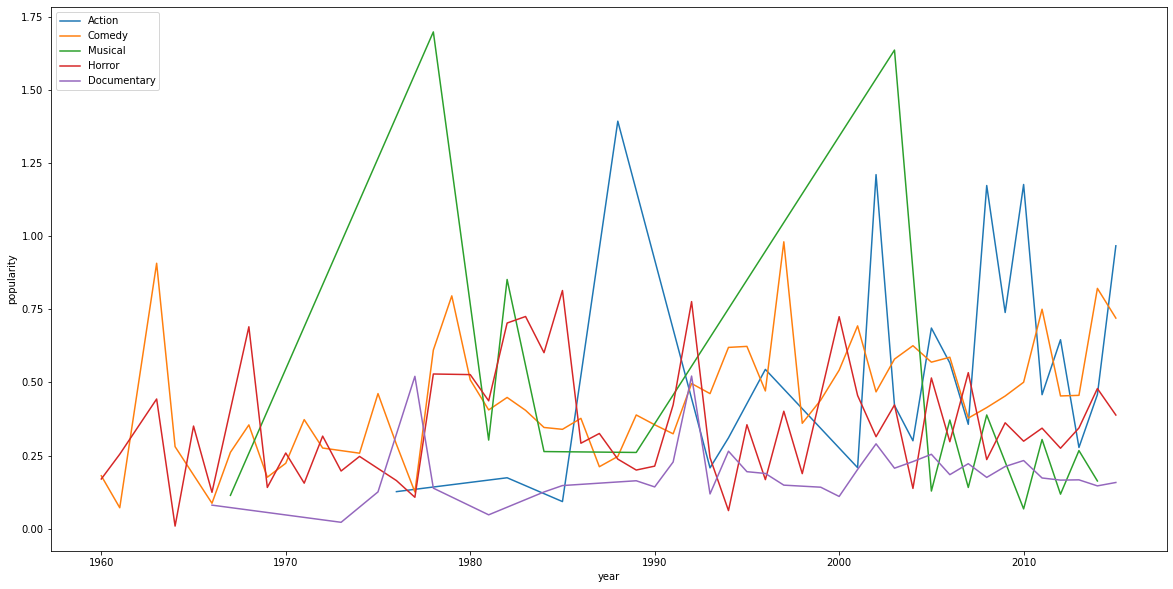

In [13]:
action = df[df['genres'] == "Action"].groupby('release_year')['popularity'].mean()
comedy = df[df['genres'] == "Comedy"].groupby('release_year')['popularity'].mean()
music = df[df['genres'] == "Music"].groupby('release_year')['popularity'].mean()
horror = df[df['genres'] == "Horror"].groupby('release_year')['popularity'].mean()
doc = df[df['genres'] == "Documentary"].groupby('release_year')['popularity'].mean()
plt.figure(figsize = (20,10))
plt.plot(action, label = "Action")
plt.plot(comedy, label = "Comedy")
plt.plot(music, label = "Musical")
plt.plot(horror, label = "Horror")
plt.plot(doc, label = "Documentary")
plt.xlabel("year")
plt.ylabel("popularity")
plt.legend(loc='upper left')

### Seems like no certain genre was actually that dominant for a long time.

## Research Question 2: What property is associated with high revenue?

### Top earning directors in terms of revenue

In [76]:
director = df[(df['director'].isna() ==False)  ].groupby("director")["revenue"].mean().reset_index()
director = director.groupby("revenue")['director'].apply(lambda x: ' '.join(" ".join(str(x).split()).split("|")[0].split(" ")[1:3])).reset_index()

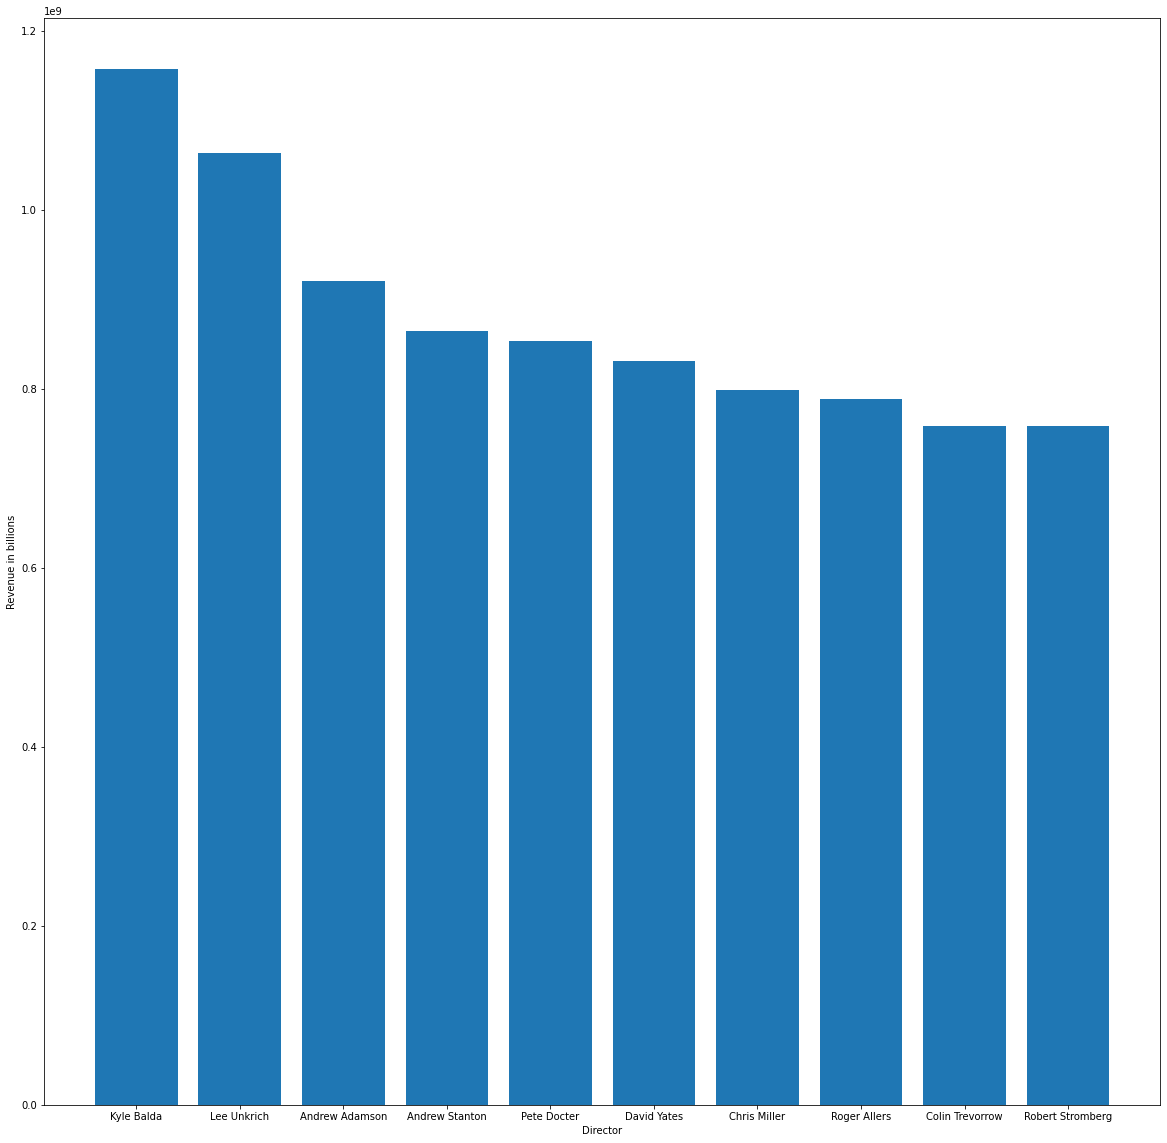

In [79]:
#print(director.iloc[:])
plt.figure(figsize = (20,20))
plt.bar(director.sort_values("revenue",ascending = False).director[:10], director.sort_values("revenue",ascending = False).revenue[:10]) 
plt.xlabel("Director")
plt.ylabel("Revenue in billions")
plt.rc('font', size = 10)

### Top earning lead actors in terms of revenue

In [84]:
actor = df[df['cast'].isna() ==False].groupby("cast")["revenue"].mean().reset_index()
actor = actor.groupby("revenue")['cast'].apply(lambda x: ' '.join(" ".join(str(x).split()).split("|")[0].split(" ")[1:])).reset_index()

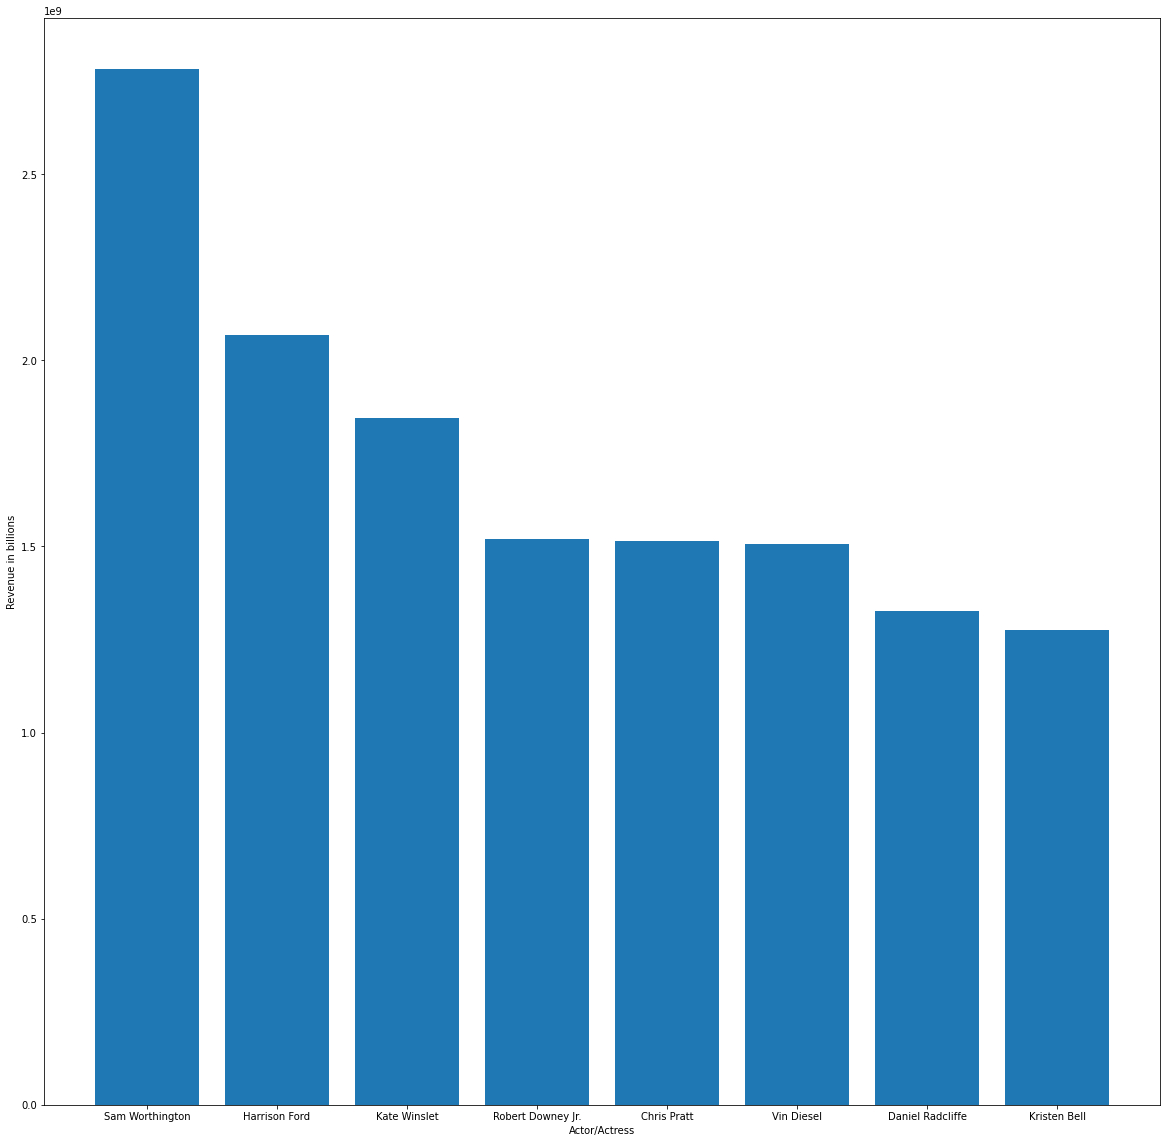

In [90]:
#print(actor.iloc[:])
plt.figure(figsize = (20,20))
plt.bar(actor.sort_values("revenue",ascending = False).cast[:10], actor.sort_values("revenue",ascending = False).revenue[:10]) 
plt.xlabel("Actor/Actress")
plt.ylabel("Revenue in billions")
plt.rc('font', size = 10)

## It could also be production companies

In [91]:
prod = df[df['production_companies'].isna() ==False].groupby("production_companies")["revenue"].mean().reset_index()
prod = prod.groupby("revenue")['production_companies'].apply(lambda x: ' '.join(" ".join(str(x).split()).split("|")[0].split(" ")[1:])).reset_index()

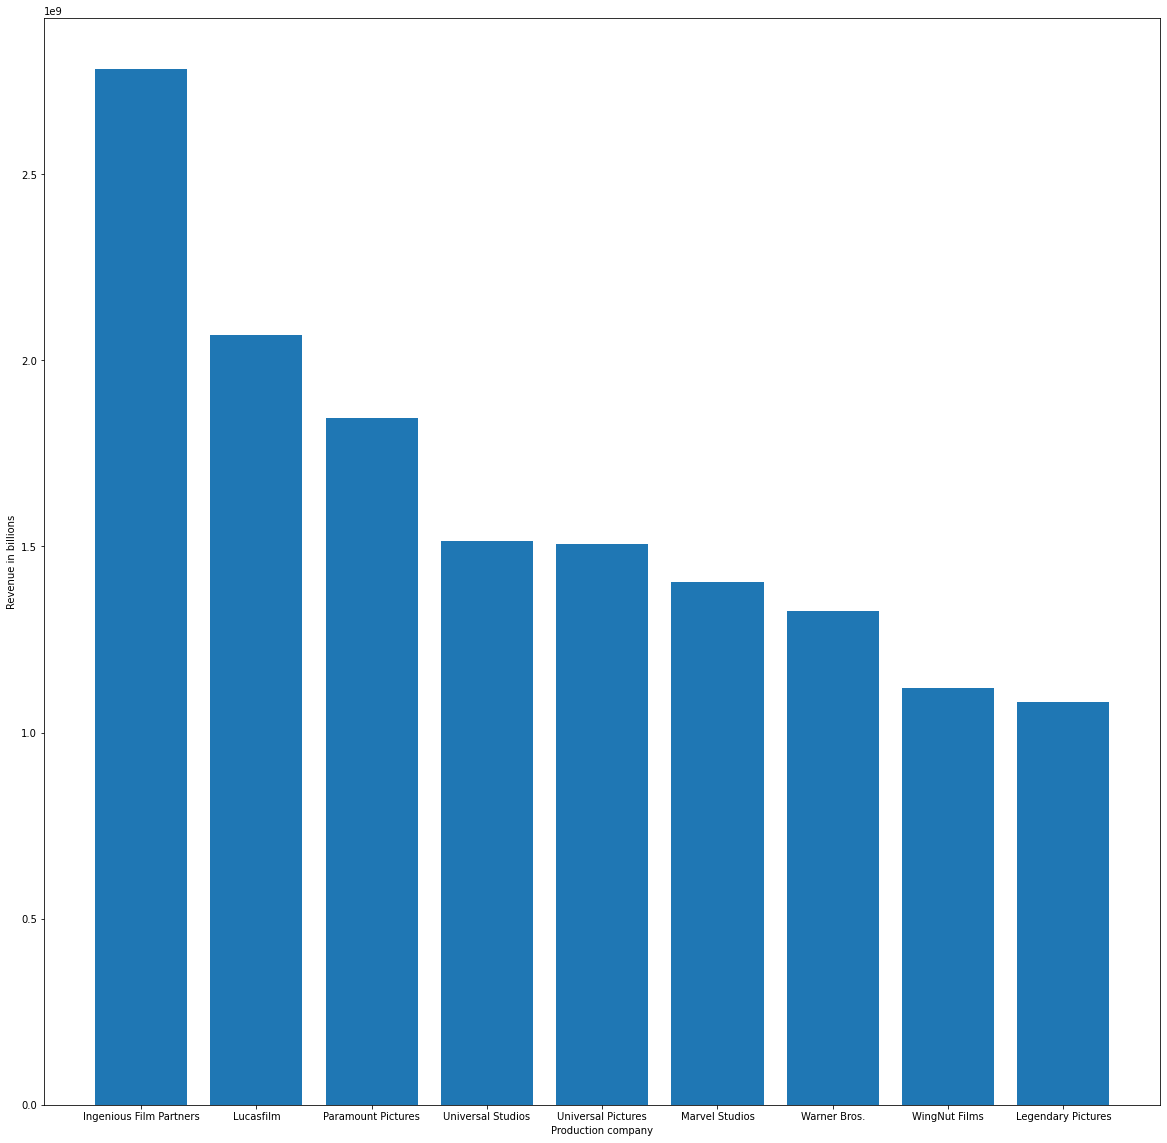

In [95]:
#print(prod.iloc[:])
plt.figure(figsize = (20,20))
plt.bar(prod.sort_values("revenue",ascending = False).production_companies[:10], prod.sort_values("revenue",ascending = False).revenue[:10]) 
plt.xlabel("Production company")
plt.ylabel("Revenue in billions")
plt.rc('font', size = 10)

### Seems people could be loving to watch movies with certain actors or directors which might explain the top actors and directors or companies.

### Maybe budget is associated with revenue?

#### We'll take 100 million dollars of revenue as high enough to be considered high revenue

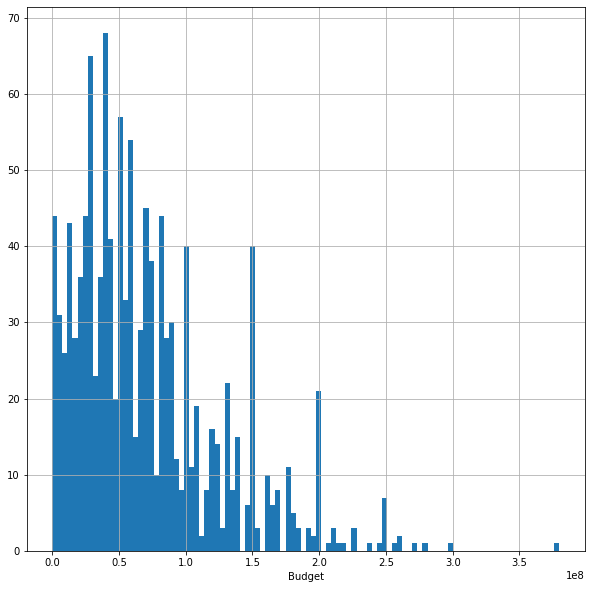

In [121]:
revenue = df.revenue > 100 * 10**6
df.budget[revenue].hist(figsize=(10,10),bins = 100);
plt.xlabel("Budget");

### Budget seems to be skewed to the right, maybe you shouldn't spend that much to earn that much

## could it be the runtime of the movie?

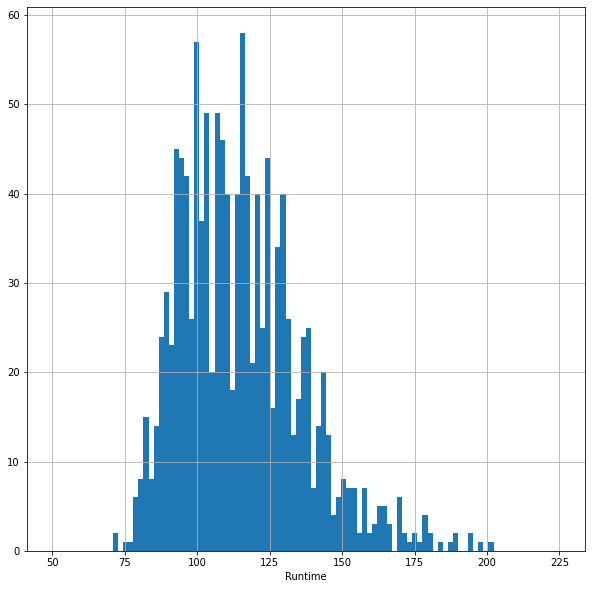

In [122]:
df.runtime[revenue].hist(figsize=(10,10),bins = 100,range = (50, 225))
plt.xlabel("Runtime");

### Could only tell that your movie souldn't be too short or too long

### It may be the rating?

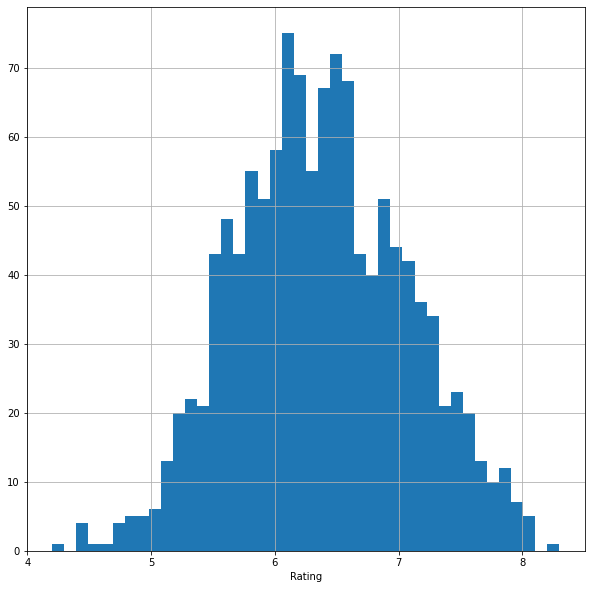

In [123]:
df.vote_average[revenue].hist(figsize=(10,10),bins = 42)
plt.xlabel("Rating");

### Seems like the highest earning movies aren't so highly rated after all

### Could it be the popularity?

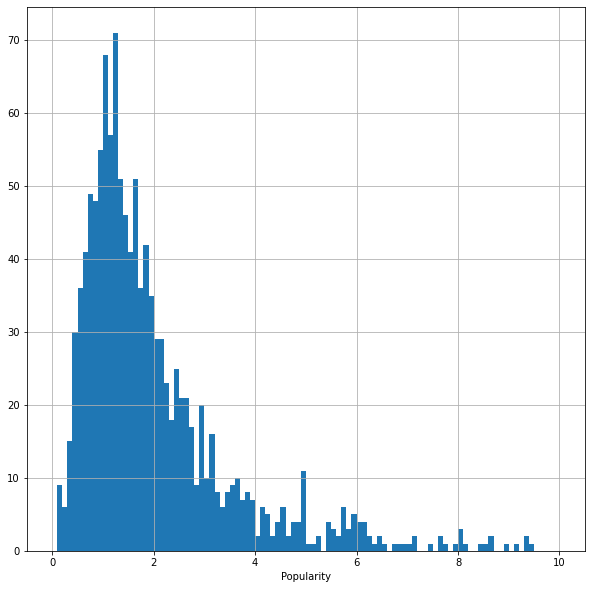

In [124]:
df.popularity[revenue].hist(figsize=(10,10),bins = 100,range = (0, 10))
plt.xlabel("Popularity");

### popularity doesn't seem to be it much, maybe because the most popular movies are usually watched over tv or pirated?

<a id='conclusions'></a>
## Conclusions

> In conclusion, movies' sucess seems to depend on alot of things, nothing here can really accurately describe how they are determined on its own, you should take all of them to determine the success of a movie, whether by popularity rating or by revenue, and determining these variables on its own is another level, as they on their own depend on lower level variables, which could be actors or directors or just how good the movie is or the marketing of it.



### Limitations
> 1 limitation I faced is failing to understand popularity's numbers, they seem to be very divergent, ther mean is under 10, but there could be numbers that reach 20 and 30, it's not clear out of how much is it, and based on what

